**Business Problem Understanding

#CONTEXT

During the last few decades, with the rise of Youtube, Amazon, Netflix and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries)

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. As a proof of the importance of recommender systems, we can mention that, a few years ago, Netflix organised a challenges (the “Netflix prize”) where the goal was to produce a recommender system that performs better than its own algorithm with a prize of 1 million dollars to win

**Import Necessary Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

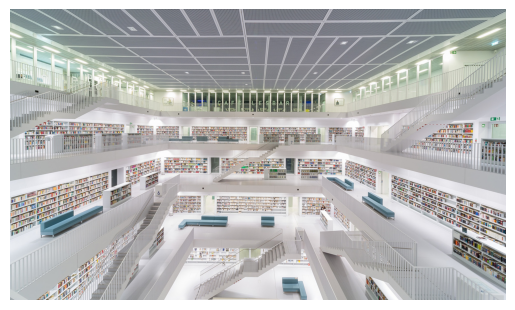

In [4]:
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('StuttgartSelect.jpg')

# Display the image

plt.imshow(img)
plt.axis('off')    # Hide the axes
plt.show()

**Load The DataSet

In [2]:
df_Users = pd.read_csv('Users.csv')
df_Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


**Data Understanding

In [3]:
df_Users['Location'].value_counts()

Location
london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: count, Length: 57339, dtype: int64

In [4]:
df_Users['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [5]:
df_Users['Location'].nunique()

57339

In [6]:
df_Users['Age'].value_counts()

Age
24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
168.0       1
132.0       1
159.0       1
186.0       1
127.0       1
Name: count, Length: 165, dtype: int64

In [7]:
df_Users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [8]:
df_Users['Age'].nunique()

165

In [9]:
df_Users['Age'].isnull().sum()

110762

In [10]:
df_Users['Age'].shape

(278858,)

In [11]:
df_Ratings = pd.read_csv('Ratings.csv')
df_Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
df_Ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [13]:
df_Ratings['Book-Rating'].nunique()

11

In [14]:
df_Ratings['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [15]:
df_Books = pd.read_csv('Books.csv')
df_Books.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16184\3359914378.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Books = pd.read_csv('Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [16]:
df_Books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [17]:
df_Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

**Removing Unwanted Columns

In [18]:
df_Books.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)
df_Books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [19]:
df_Books['Book-Title'].value_counts()

Book-Title
Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
What Every Kid Should Know                                                                                                         1
The Seventh Enemy (A Brady Coyne Mystery)                 

In [20]:
df_Books['Book-Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [21]:
df_Books['Book-Title'].nunique()

242135

In [22]:
df_Books.dropna(inplace=True)

In [23]:
df_Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [24]:
df_Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

**Check Shape of Dataset

In [25]:
print(df_Users.shape)
print(df_Books.shape)
print(df_Ratings.shape)

(278858, 3)
(271356, 5)
(1149780, 3)


In [26]:
df_Books.duplicated().sum()

0

In [27]:
df_Users.duplicated().sum()

0

In [28]:
df_Ratings.duplicated().sum()

0

**Sorting 

In [29]:
# Calculate the count of ratings given by each user and store it in the 'ratings' Series

ratings = df_Ratings['User-ID'].value_counts()

# Sort the 'ratings' Series in descending order based on the counts of user IDs

ratings.sort_values(ascending=False).head()

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
Name: count, dtype: int64

In [30]:
name_with_ratings=df_Ratings.merge(df_Books, on='ISBN' )

In [31]:
name_with_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1031127,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031128,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031129,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple
1031130,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


In [32]:
df_Ratings.merge(df_Books, on='ISBN' ).shape

(1031132, 7)

In [33]:
name_with_ratings.groupby('Book-Title').count()

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher
Book-Title,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,4,4,4,4,4
Always Have Popsicles,1,1,1,1,1,1
Apple Magic (The Collector's series),1,1,1,1,1,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,1,1,1,1,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,1,1,1,1,1
...,...,...,...,...,...,...
Ã?Â?lpiraten.,2,2,2,2,2,2
Ã?Â?rger mit Produkt X. Roman.,4,4,4,4,4,4
Ã?Â?sterlich leben.,1,1,1,1,1,1


In [34]:
name_with_ratings.groupby('Book-Title').count()['Book-Rating']

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    4
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
                                                                                                             ..
Ã?Â?lpiraten.                                                                                                 2
Ã?Â?rger mit Produkt X. Roman.                                                                                4
Ã?Â?sterlich leben.                                                                          

In [35]:
name_with_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241063,Ã?Â?lpiraten.,2
241064,Ã?Â?rger mit Produkt X. Roman.,4
241065,Ã?Â?sterlich leben.,1
241066,Ã?Â?stlich der Berge.,3


In [36]:
number_ratings=name_with_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [37]:
number_ratings

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241063,Ã?Â?lpiraten.,2
241064,Ã?Â?rger mit Produkt X. Roman.,4
241065,Ã?Â?sterlich leben.,1
241066,Ã?Â?stlich der Berge.,3


In [38]:
number_ratings.rename(columns={'Book-Rating':'number_ratings'},inplace=True)

In [39]:
number_ratings

,Book-Title,number_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241063,Ã?Â?lpiraten.,2
241064,Ã?Â?rger mit Produkt X. Roman.,4
241065,Ã?Â?sterlich leben.,1
241066,Ã?Â?stlich der Berge.,3


In [40]:
avg_rating_df = name_with_ratings.groupby('Book-Title')['Book-Rating'].agg(lambda x: x.astype(float).mean()).reset_index()
avg_rating_df.rename(columns = {'Book-Rating' : 'avg_rating'}, inplace = True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241063,Ã?Â?lpiraten.,0.000000
241064,Ã?Â?rger mit Produkt X. Roman.,5.250000
241065,Ã?Â?sterlich leben.,7.000000
241066,Ã?Â?stlich der Berge.,2.666667


In [41]:
popular = number_ratings.merge(avg_rating_df,on='Book-Title')
popular

,Book-Title,number_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241063,Ã?Â?lpiraten.,2,0.000000
241064,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241065,Ã?Â?sterlich leben.,1,7.000000
241066,Ã?Â?stlich der Berge.,3,2.666667


In [42]:
popular[popular['number_ratings']>=200]

,Book-Title,number_ratings,avg_rating
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2120,A Case of Need,236,2.423729
...,...,...,...
234948,Wild Animus,2502,1.019584
236331,Wish You Well,234,3.012821
236721,Without Remorse,203,2.881773
240410,Zen and the Art of Motorcycle Maintenance: An ...,210,3.147619


In [43]:
popular[popular['number_ratings']>=200].sort_values('avg_rating',ascending=False).head(15)

,Book-Title,number_ratings,avg_rating
80433,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80421,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80440,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80425,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
60581,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
80413,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191610,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187375,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80444,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211382,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769


In [44]:
popular.merge(df_Books,on='Book-Title')

,Book-Title,number_ratings,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000,0590567330,Karen Hesse,1999,Hyperion Books for Children
1,Always Have Popsicles,1,0.000000,0964147726,Rebecca Harvin,1994,Rebecca L. Harvin
2,Apple Magic (The Collector's series),1,0.000000,0942320093,Martina Boudreau,1984,Amer Cooking Guild
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000,0310232546,Nancy N. Rue,2001,Zonderkidz
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000,0962295701,Lou Mobley,1989,"Teleonet, Incorporated"
...,...,...,...,...,...,...,...
270287,Ã?Â?lpiraten.,2,0.000000,3499232499,Janwillem van de Wetering,2002,Rowohlt Tb.
270288,Ã?Â?rger mit Produkt X. Roman.,4,5.250000,325721538X,Joan Aiken,1987,Diogenes Verlag
270289,Ã?Â?sterlich leben.,1,7.000000,3451274973,Anselm GrÃ?Â¼n,2001,"Herder, Freiburg"
270290,Ã?Â?stlich der Berge.,3,2.666667,3442725739,David Guterson,2000,btb


In [45]:
popular.merge(df_Books,on='Book-Title').drop_duplicates('Book-Title')

,Book-Title,number_ratings,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000,0590567330,Karen Hesse,1999,Hyperion Books for Children
1,Always Have Popsicles,1,0.000000,0964147726,Rebecca Harvin,1994,Rebecca L. Harvin
2,Apple Magic (The Collector's series),1,0.000000,0942320093,Martina Boudreau,1984,Amer Cooking Guild
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000,0310232546,Nancy N. Rue,2001,Zonderkidz
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000,0962295701,Lou Mobley,1989,"Teleonet, Incorporated"
...,...,...,...,...,...,...,...
270287,Ã?Â?lpiraten.,2,0.000000,3499232499,Janwillem van de Wetering,2002,Rowohlt Tb.
270288,Ã?Â?rger mit Produkt X. Roman.,4,5.250000,325721538X,Joan Aiken,1987,Diogenes Verlag
270289,Ã?Â?sterlich leben.,1,7.000000,3451274973,Anselm GrÃ?Â¼n,2001,"Herder, Freiburg"
270290,Ã?Â?stlich der Berge.,3,2.666667,3442725739,David Guterson,2000,btb


In [46]:
popular.merge(df_Books,on='Book-Title').drop_duplicates('Book-Title')

,Book-Title,number_ratings,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000,0590567330,Karen Hesse,1999,Hyperion Books for Children
1,Always Have Popsicles,1,0.000000,0964147726,Rebecca Harvin,1994,Rebecca L. Harvin
2,Apple Magic (The Collector's series),1,0.000000,0942320093,Martina Boudreau,1984,Amer Cooking Guild
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000,0310232546,Nancy N. Rue,2001,Zonderkidz
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000,0962295701,Lou Mobley,1989,"Teleonet, Incorporated"
...,...,...,...,...,...,...,...
270287,Ã?Â?lpiraten.,2,0.000000,3499232499,Janwillem van de Wetering,2002,Rowohlt Tb.
270288,Ã?Â?rger mit Produkt X. Roman.,4,5.250000,325721538X,Joan Aiken,1987,Diogenes Verlag
270289,Ã?Â?sterlich leben.,1,7.000000,3451274973,Anselm GrÃ?Â¼n,2001,"Herder, Freiburg"
270290,Ã?Â?stlich der Berge.,3,2.666667,3442725739,David Guterson,2000,btb


**Collab Filtering

In [47]:
name_with_ratings.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [48]:
s=name_with_ratings.groupby('User-ID').count()['Book-Rating']>200
s[s].index

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

In [49]:
s=name_with_ratings.groupby('User-ID').count()['Book-Rating']>200
intellectual=s[s].index

In [50]:
name_with_ratings['User-ID'].isin(intellectual)

0          False
1          False
2           True
3          False
4          False
           ...  
1031127    False
1031128    False
1031129    False
1031130    False
1031131    False
Name: User-ID, Length: 1031132, dtype: bool

In [51]:
name_with_ratings[name_with_ratings['User-ID'].isin(intellectual)]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1030879,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing
1030880,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher
1030881,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press
1030882,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA)


In [52]:
filtered_ratings=name_with_ratings[name_with_ratings['User-ID'].isin(intellectual)]

In [53]:
filtered_ratings.groupby('Book-Title').count()['Book-Rating']>50

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [54]:
s=filtered_ratings.groupby('Book-Title').count()['Book-Rating']>50
famous_books=s[s].index

In [55]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=679)

In [56]:
filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books
...,...,...,...,...,...,...,...
1026720,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub
1027919,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA
1028773,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island
1029066,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster


In [57]:
final_ratings=filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

In [58]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books
...,...,...,...,...,...,...,...
1026720,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub
1027919,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA
1028773,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island
1029066,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster


In [59]:
pv=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [60]:
pv

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [61]:
pv.fillna(0,inplace=True)

In [92]:
pv.head(15)

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Civil Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Day Late and a Dollar Short,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
similar_scores=cosine_similarity(pv)

In [65]:
similar_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [66]:
similar_scores.shape

(679, 679)

In [68]:
def recommend(book_name):
    # index fetch
    return suggestion 


In [70]:
np.where(pv.index=='Year of Wonders')[0][0]

674

In [77]:
list(enumerate(similar_scores[0]))

[(0, 0.9999999999999999),
 (1, 0.10255024829874465),
 (2, 0.012208555646509366),
 (3, 0.0),
 (4, 0.053672244225442485),
 (5, 0.027749013024662858),
 (6, 0.08216491130000354),
 (7, 0.13732869060263378),
 (8, 0.03261686350494277),
 (9, 0.03667590746512177),
 (10, 0.02322418425912186),
 (11, 0.06766486753662343),
 (12, 0.020839782065795794),
 (13, 0.09673734976610586),
 (14, 0.08303111691811028),
 (15, 0.1115354275858341),
 (16, 0.05100410510067514),
 (17, 0.025177841632809915),
 (18, 0.11706383185253948),
 (19, 0.0),
 (20, 0.14333792815336935),
 (21, 0.07847534327232125),
 (22, 0.06150451339525138),
 (23, 0.08723968326958673),
 (24, 0.0),
 (25, 0.07009814362931202),
 (26, 0.13658680855472938),
 (27, 0.07600327535501016),
 (28, 0.12167133598776536),
 (29, 0.007680459111722776),
 (30, 0.01473221255132234),
 (31, 0.0),
 (32, 0.07965814289647455),
 (33, 0.04522616573040869),
 (34, 0.01556270914112474),
 (35, 0.09495937740802214),
 (36, 0.018230696811058135),
 (37, 0.026104653172312028),
 (38

In [75]:
sorted(list(enumerate(similar_scores[0])),key=lambda x:x[1])

[(3, 0.0),
 (19, 0.0),
 (24, 0.0),
 (31, 0.0),
 (51, 0.0),
 (54, 0.0),
 (60, 0.0),
 (66, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (81, 0.0),
 (88, 0.0),
 (96, 0.0),
 (101, 0.0),
 (127, 0.0),
 (128, 0.0),
 (129, 0.0),
 (133, 0.0),
 (137, 0.0),
 (138, 0.0),
 (154, 0.0),
 (166, 0.0),
 (169, 0.0),
 (172, 0.0),
 (184, 0.0),
 (194, 0.0),
 (203, 0.0),
 (214, 0.0),
 (228, 0.0),
 (236, 0.0),
 (238, 0.0),
 (253, 0.0),
 (256, 0.0),
 (263, 0.0),
 (264, 0.0),
 (277, 0.0),
 (280, 0.0),
 (296, 0.0),
 (299, 0.0),
 (303, 0.0),
 (323, 0.0),
 (324, 0.0),
 (328, 0.0),
 (339, 0.0),
 (344, 0.0),
 (354, 0.0),
 (362, 0.0),
 (365, 0.0),
 (374, 0.0),
 (376, 0.0),
 (377, 0.0),
 (385, 0.0),
 (389, 0.0),
 (391, 0.0),
 (394, 0.0),
 (417, 0.0),
 (432, 0.0),
 (434, 0.0),
 (435, 0.0),
 (438, 0.0),
 (439, 0.0),
 (450, 0.0),
 (453, 0.0),
 (455, 0.0),
 (461, 0.0),
 (473, 0.0),
 (474, 0.0),
 (479, 0.0),
 (500, 0.0),
 (504, 0.0),
 (549, 0.0),
 (550, 0.0),
 (562, 0.0),
 (568, 0.0),
 (579, 0.0),
 (609, 0.0),
 (615, 0.0),
 

In [90]:
def recommend(book_name):
    # index fetch
    index = np.where(pv.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similar_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    for i in similar_items:
        print(pv.index[i[0]])


In [91]:
recommend('Year of Wonders')

The Eight
A Heartbreaking Work of Staggering Genius
Bridget Jones: The Edge of Reason
Drowning Ruth (Oprah's Book Club)


In [88]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)


In [89]:
pv.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=679)

In [93]:
recommend('A Bend in the Road')

A Walk to Remember
The Last Time They Met : A Novel
Sea Glass: A Novel
Angels
